<a href="https://colab.research.google.com/github/iamarshadhere/AIML_2303A51334/blob/main/ADM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Create a synthetic dataset
np.random.seed(42)
data = np.random.normal(0, 1, 100) # Normal distribution
outliers = np.random.uniform(5, 10, 5) # Artificial outliers

In [3]:
data_with_outliers = np.concatenate([data, outliers])

In [4]:
# Convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [5]:
# Step 1: Detect Outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [6]:
# Identifying outliers based on IQR
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] >
upper_bound)]

In [7]:
# Step 2: Detect Outliers using Z-Score method
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

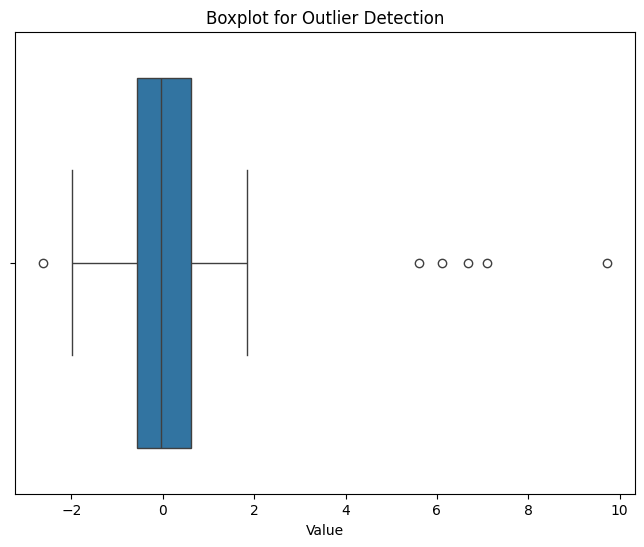

In [8]:
# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [9]:
# Step 4: Handle Outliers
# Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [10]:
# Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]


In [11]:
# Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

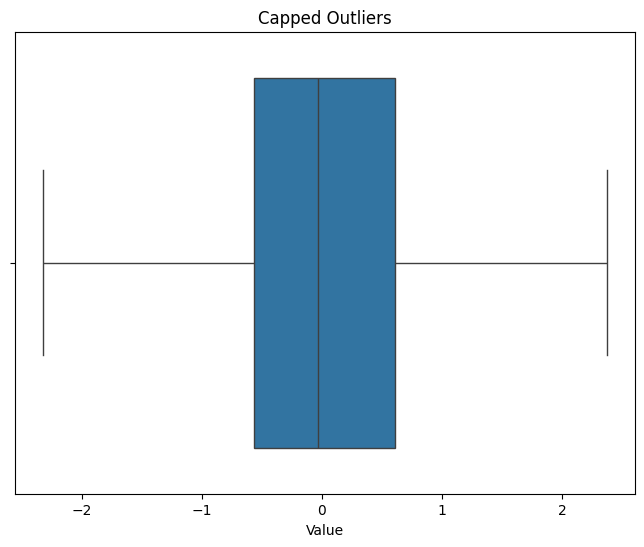

In [12]:
# Step 5: Visualize handled data
# Capped data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

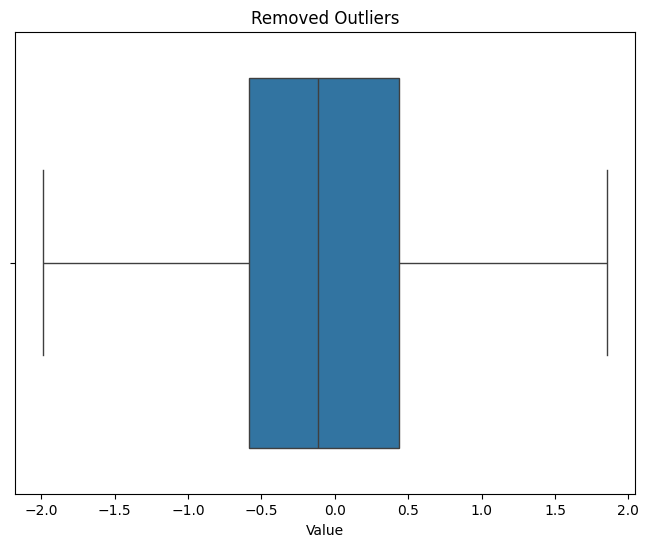

In [13]:
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()


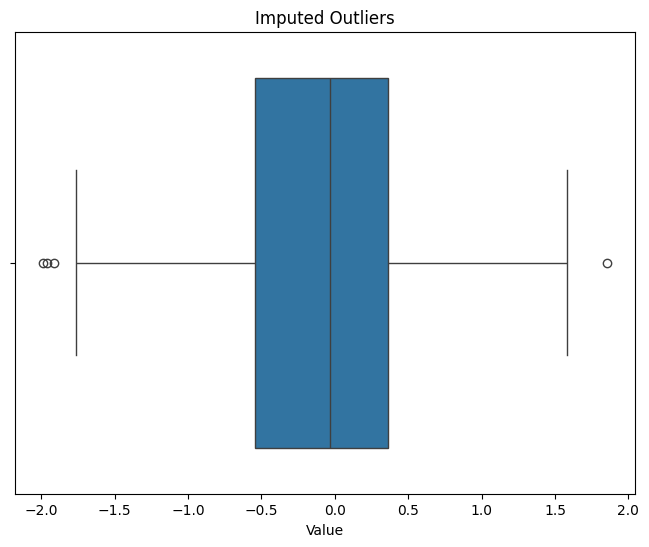

In [14]:
# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()


In [15]:
# Print outliers detected
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")

Outliers detected using IQR:
        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
Outliers detected using Z-Score:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


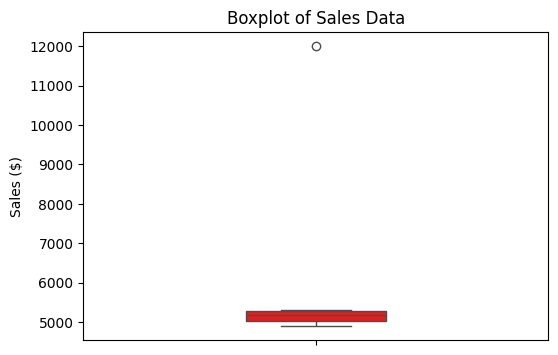

Outliers detected using IQR method:
  Salesperson  Sales ($)
4           E      12000

Outliers detected using Z-score method:
Empty DataFrame
Columns: [Salesperson, Sales ($), Z-score]
Index: []


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load sales data
sales_data = pd.DataFrame({
    "Salesperson": ["A", "B", "C", "D", "E", "F"],
    "Sales ($)": [5000, 5200, 4900, 5150, 12000, 5300]
})

# Boxplot visualization
plt.figure(figsize=(6, 4))
sns.boxplot(y=sales_data["Sales ($)"], color="red", width=0.3)
plt.title("Boxplot of Sales Data")
plt.show()

# IQR Method for Outliers
Q1 = sales_data["Sales ($)"].quantile(0.25)
Q3 = sales_data["Sales ($)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = sales_data[(sales_data["Sales ($)"] < lower_bound) | (sales_data["Sales ($)"] > upper_bound)]
print("Outliers detected using IQR method:")
print(iqr_outliers)

# Z-score Method for Outliers
sales_data["Z-score"] = zscore(sales_data["Sales ($)"])
zscore_outliers = sales_data[abs(sales_data["Z-score"]) > 3]
print("\nOutliers detected using Z-score method:")
print(zscore_outliers)